In [ ]:
# PowerPulse: Household Energy Usage Forecast
# 1. Title and Problem Statement (Markdown Cell)

## Problem Statement
"""In the modern world, energy management is a critical issue for both households and energy providers.  
This project aims to predict household energy consumption based on historical data, enabling better planning, cost reduction, and resource optimization.

### Objectives
- Clean and preprocess energy data
- Engineer time-based and relevant features
- Train and evaluate regression models
- Visualize model results and feature importance
- Detect outliers and understand patterns
- Provide actionable insights into energy usage"""


In [ ]:
#  2. Import Libraries (Code Cell)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [ ]:
#  3. Load and View Data (Code Cell)
def load_data(filepath):
    df = pd.read_csv(filepath, sep=';', low_memory=False,
                     parse_dates={'Datetime': ['Date', 'Time']},
                     infer_datetime_format=True, na_values='?', index_col='Datetime')
    return df

df = load_data("household_power_consumption.txt")
df.head()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
#4. Initial Data Exploration (Code Cell)
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [ ]:
#  5. Data Cleaning (Code Cell)
# Convert to float and fill missing values
df = df.astype(float)
df.fillna(method='ffill', inplace=True)


In [5]:
# 6. Feature Engineering (Code Cell)
def create_features(df):
    df['hour'] = df.index.hour
    df['day'] = df.index.day
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['weekday'] = df.index.weekday
    return df

df = create_features(df)
df[['hour', 'day', 'month', 'year', 'weekday']].head()


,hour,day,month,year,weekday
Datetime,,,,,
2006-12-16 17:24:00,17,16,12,2006,5
2006-12-16 17:25:00,17,16,12,2006,5
2006-12-16 17:26:00,17,16,12,2006,5
2006-12-16 17:27:00,17,16,12,2006,5
2006-12-16 17:28:00,17,16,12,2006,5


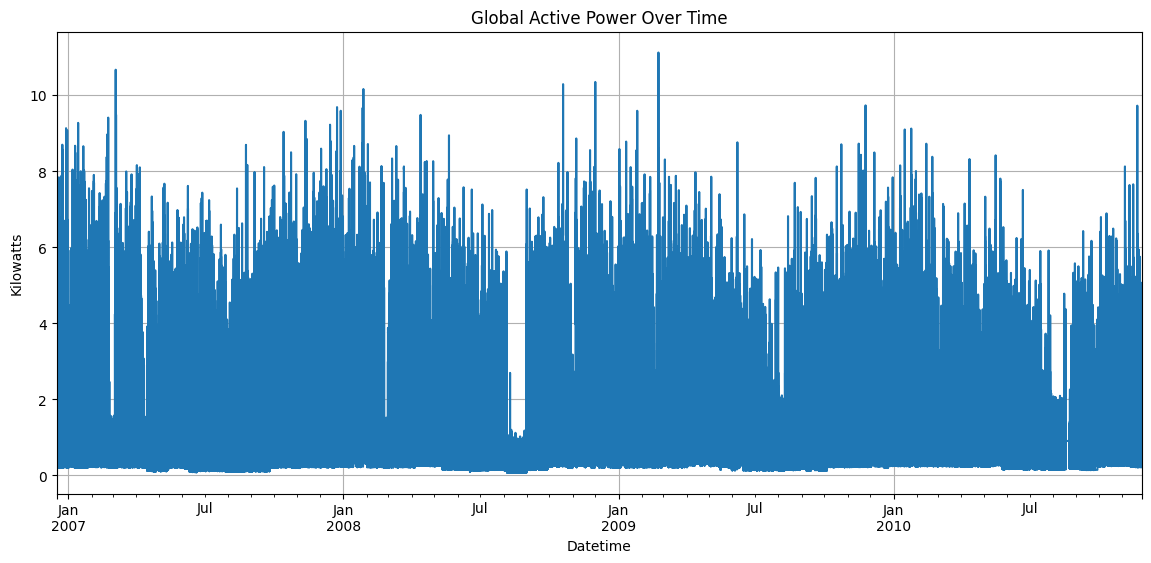

In [6]:
# 7. EDA – Time Plot and Correlation Heatmap
plt.figure(figsize=(14, 6))
df['Global_active_power'].plot()
plt.title("Global Active Power Over Time")
plt.ylabel("Kilowatts")
plt.xlabel("Datetime")
plt.grid()
plt.show()


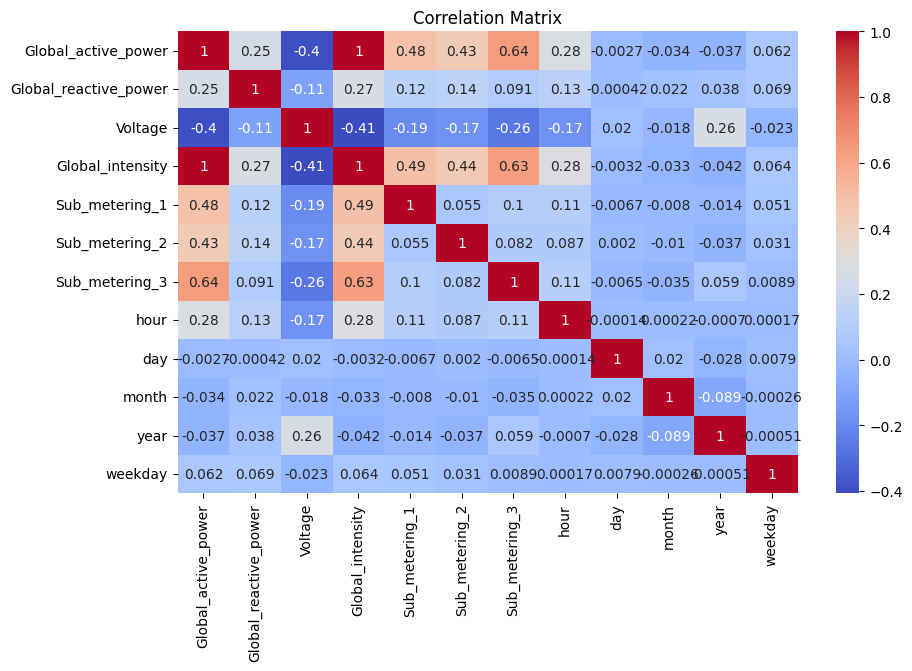

In [7]:
# 8. EDA – Time Plot and Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [8]:
#  9. Outlier Detection – Boxplots and IQR Method
def detect_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] < lower) | (df[column] > upper)]

outlier_cols = ['Global_active_power', 'Global_reactive_power', 'Voltage']
for col in outlier_cols:
    outliers = detect_outliers(col)
    print(f"{col} has {len(outliers)} outliers")


Global_active_power has 95699 outliers
Global_reactive_power has 40509 outliers
Voltage has 52822 outliers


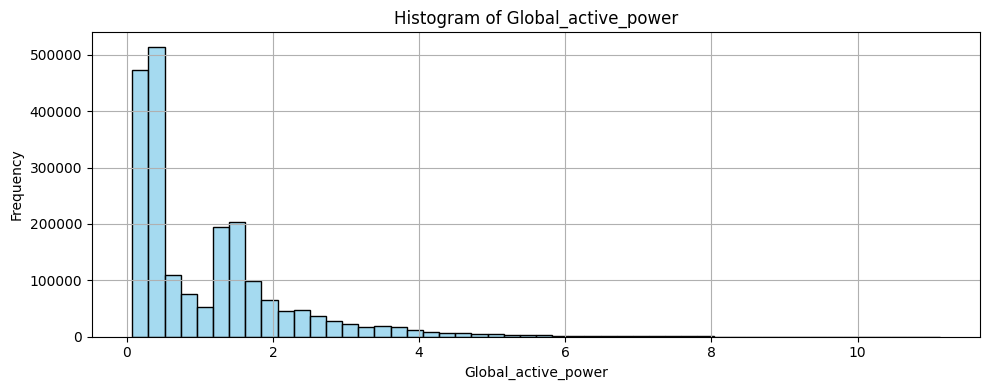

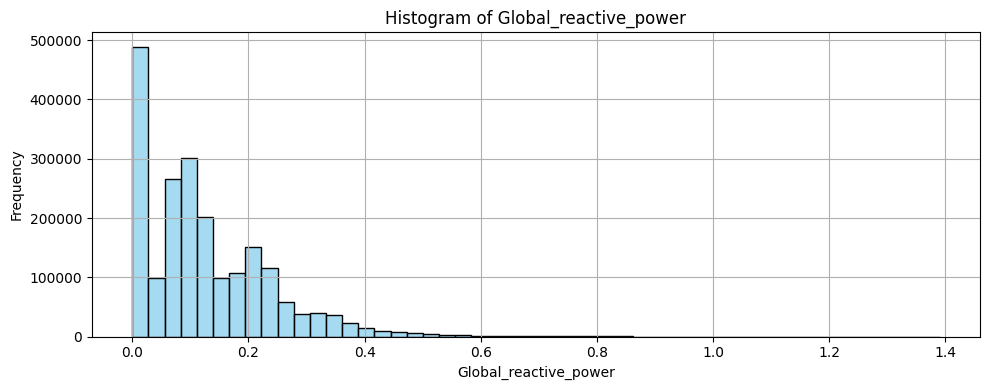

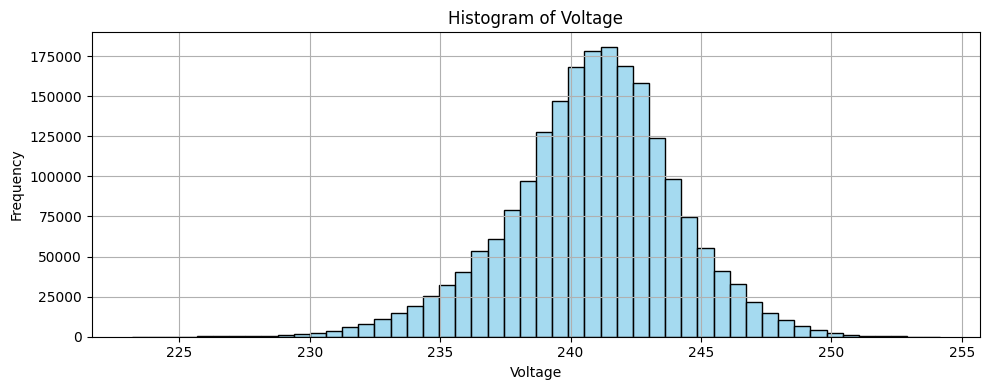

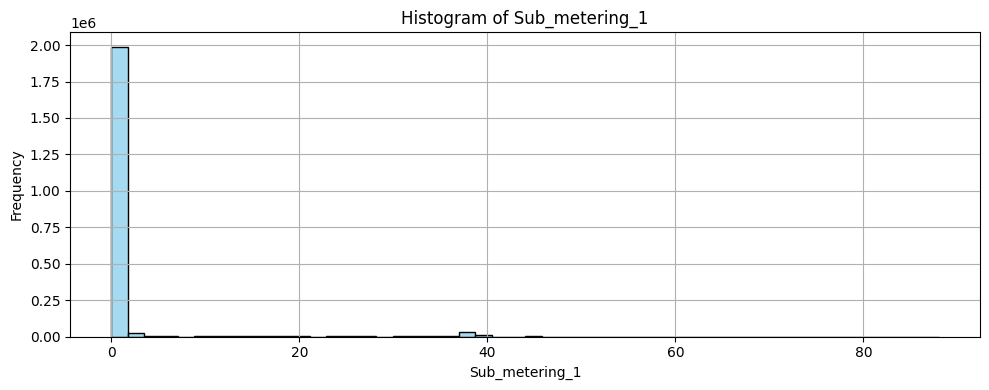

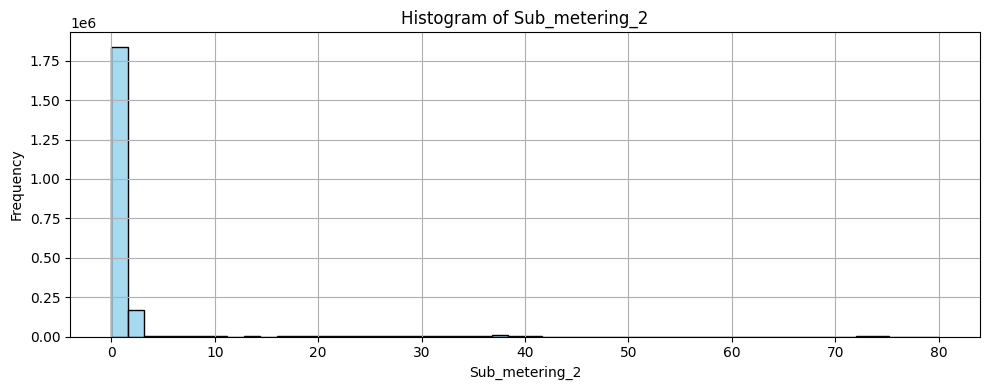

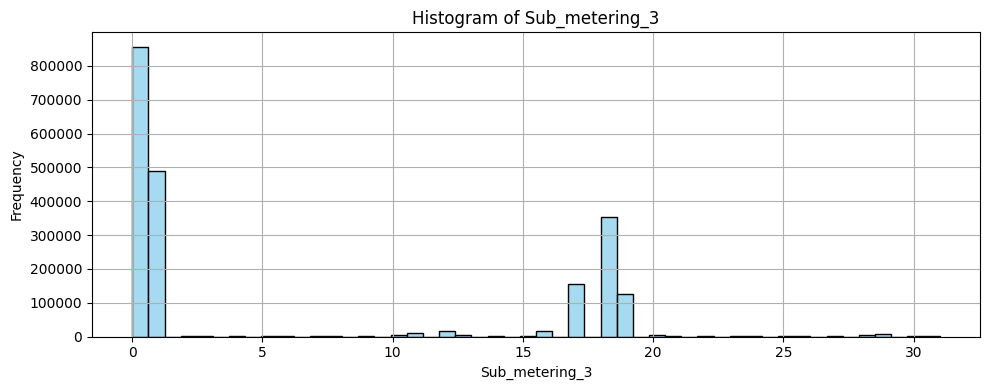

In [14]:

# Plot histograms for key numerical features
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[feature], kde=False, bins=50, color='skyblue')
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


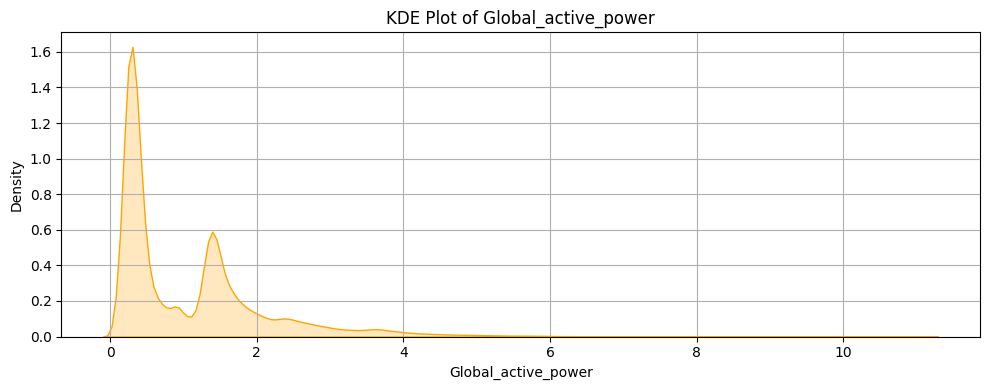

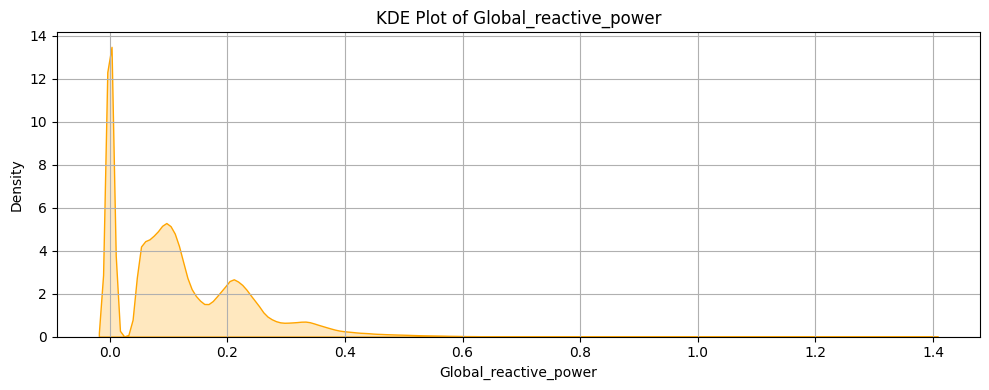

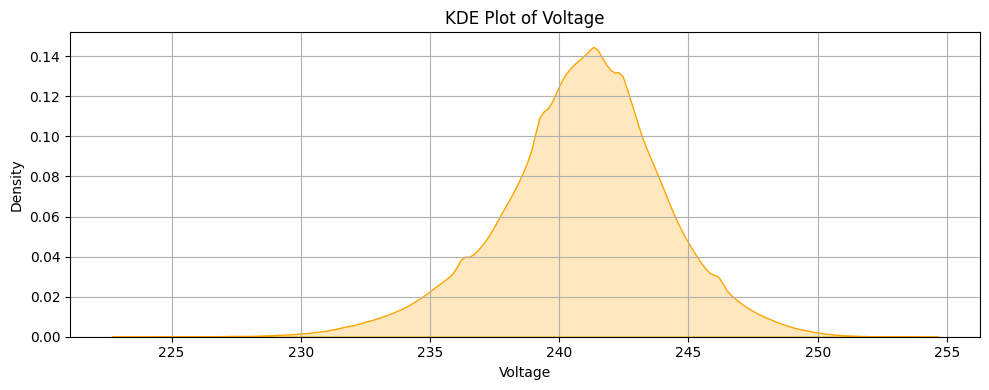

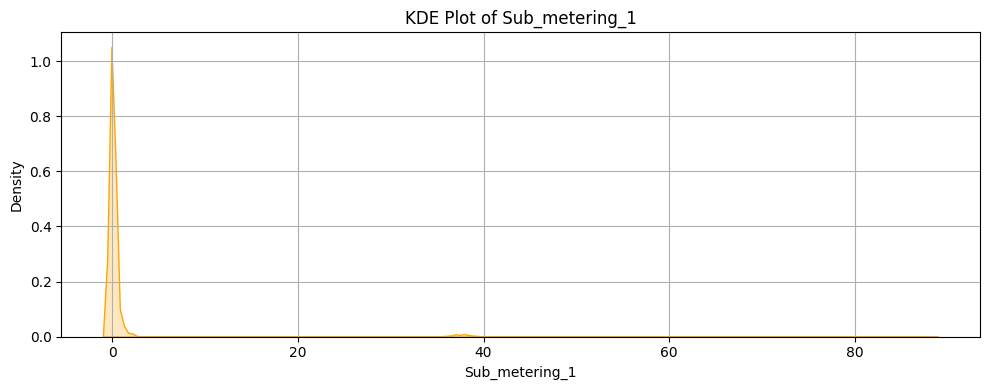

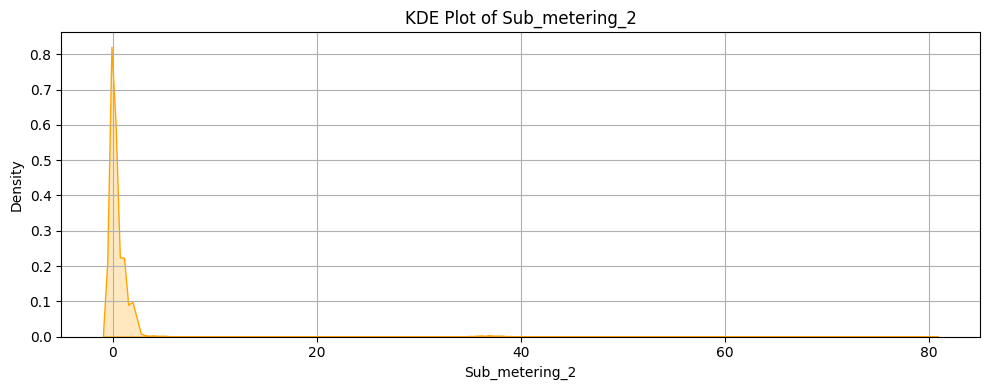

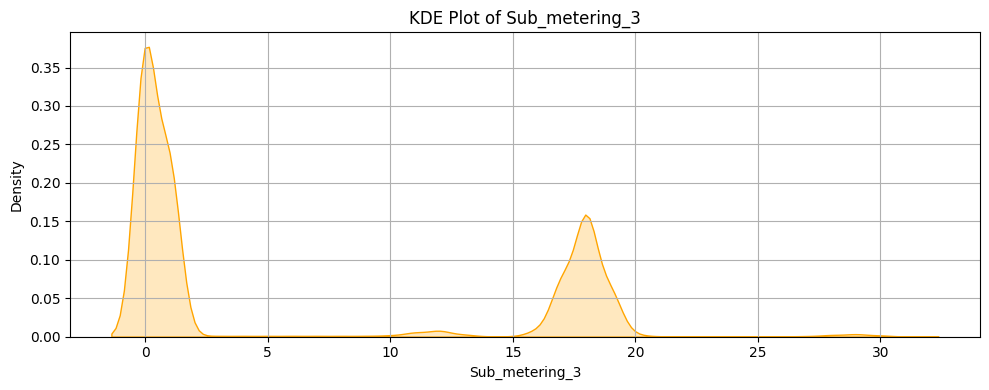

In [15]:

# Plot KDE plots for key numerical features
for feature in features:
    plt.figure(figsize=(10, 4))
    sns.kdeplot(df[feature], shade=True, color='orange')
    plt.title(f"KDE Plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


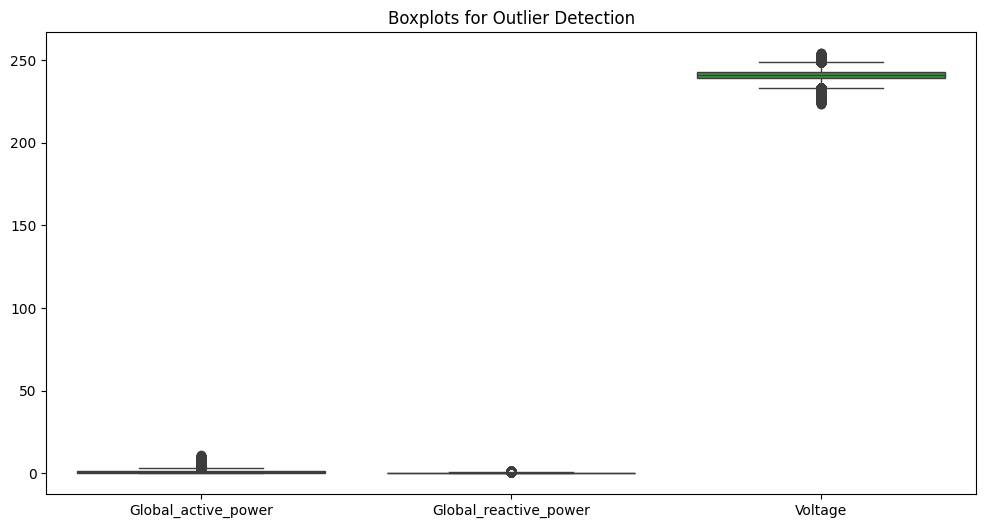

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Global_active_power', 'Global_reactive_power', 'Voltage']])
plt.title("Boxplots for Outlier Detection")
plt.show()


In [10]:
# 10. Drop Low-Correlation Columns
df.drop(columns=['Global_intensity'], inplace=True)
df.dropna(inplace=True)


In [11]:
# 11. Train/Test Split
X = df[['hour', 'day', 'month', 'year', 'weekday']]
y = df['Global_active_power']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


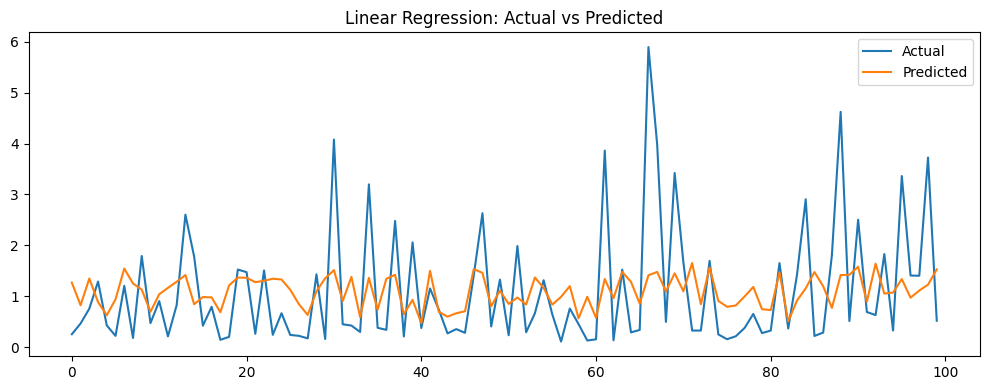

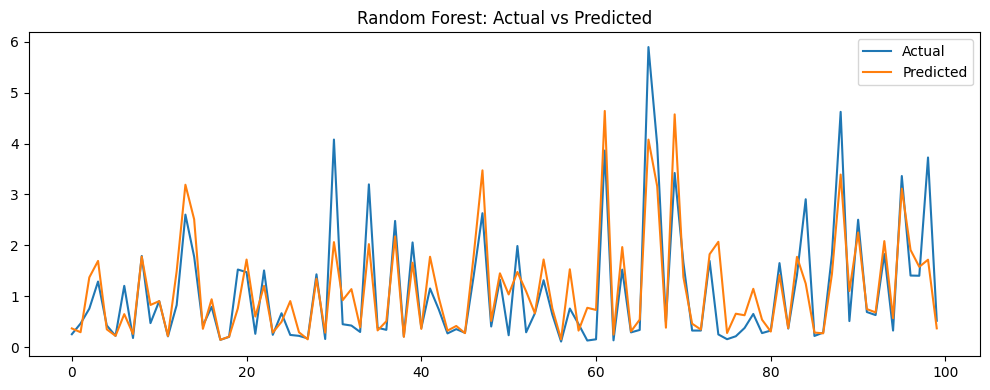

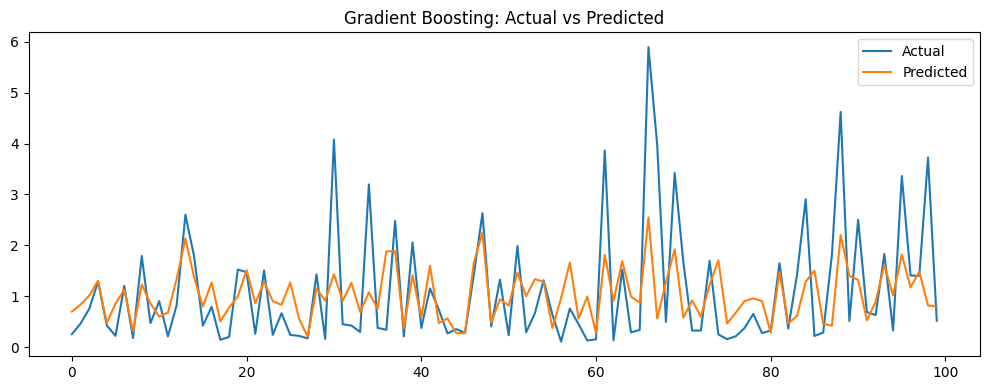

,MAE,RMSE,R²
Linear Regression,0.760895,1.008033,0.084374
Random Forest,0.323169,0.565931,0.711400
Gradient Boosting,0.620330,0.886370,0.292055


In [12]:
# 12. Train Models and Evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results[name] = {'MAE': mae, 'RMSE': rmse, 'R²': r2}
    
    # Plot actual vs predicted
    plt.figure(figsize=(10, 4))
    plt.plot(y_test.values[:100], label="Actual")
    plt.plot(preds[:100], label="Predicted")
    plt.title(f"{name}: Actual vs Predicted")
    plt.legend()
    plt.tight_layout()
    plt.show()

pd.DataFrame(results).T


In [ ]:
# 13. Feature Importance (Random Forest)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
plt.barh(importance['Feature'], importance['Importance'], color='lightgreen')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
## Conclusion
"""
- We performed full data cleaning, feature engineering, and visualization.
- Outliers were identified using boxplots and the IQR method.
- Multiple models were trained and evaluated.
- Feature importance showed which time elements influence energy usage the most.

"""